In [63]:
#importing necessary libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
import emoji
from nltk.corpus import stopwords
sw=stopwords

In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt #importing the plotting library
import seaborn as sns

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\sssva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\sssva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\sssva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\sssva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\sssva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [67]:
df=pd.read_excel('Group3-news-text-sanitized.xlsx') #reading the file

In [68]:
df = df.drop_duplicates('Tweet',keep='first') # dropping the duplicate tweets
df['Tweet'].count()

10138

In [69]:
df["Cleaned_Tweet"] = [re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", v.lower()) for v in df["Tweet"]] #cleaning then data
df

,Category,Confidence,Tweet,Cleaned_Tweet
0,Relevant,0.3342,Drowning' - Acrylic 08.05.15 https://t.co/X17f...,drowning acrylic 080515
1,Not Relevant,0.3367,Check out more data on Upper Wabash reservoirs...,check out more data on upper wabash reservoirs...
2,Relevant,0.3982,#tornado #singapore Mac and #cheese #around th...,tornado singapore mac and cheese around the wo...
3,Not Relevant,0.3994,WACKOES like #MicheleBachman predict the WORLD...,wackoes like michelebachman predict the world ...
4,Relevant,0.3994,Australia's Ashes disaster - how the collapse ...,australias ashes disaster how the collapse un...
...,...,...,...,...
10318,Relevant,1.0000,#Sismo M 1.9 - 5km S of Volcano Hawaii: Time20...,sismo m 19 5km s of volcano hawaii time201508...
10319,Relevant,1.0000,Thank you to @scegnews! Our neighborhood looks...,thank you to our neighborhood looks like a wa...
10320,Relevant,1.0000,70 years ago today the U.S. dropped a nuclear...,70 years ago today the us dropped a nuclear w...
10321,Relevant,1.0000,Iranian warship points weapon at U.S. helicopt...,iranian warship points weapon at us helicopter...


In [70]:
# Week 13
# Handling the text preprocessing by embedding the removal extra spaces in a sentence, Removing unwanted repeated characters from a sentence.
def normalizepreprocessdata(data):
    stop_words = set(stopwords.words('english'))
    # Removing the stop wors form the data.
    words = [word for word in data.split() if word not in stop_words]
    # Normalize emojis
    words = [emoji.demojize(tweet) for tweet in words]
    # Remove unnecessary spacing and handle repeated characters
    words = [re.sub(r'(.)\1+', r'\1\1', word.strip()) for word in words]
    words = ' '.join(words)
    return words


In [71]:
df["Cleaned_Tweet"] = df["Cleaned_Tweet"].apply(normalizepreprocessdata)
df

,Category,Confidence,Tweet,Cleaned_Tweet
0,Relevant,0.3342,Drowning' - Acrylic 08.05.15 https://t.co/X17f...,drowning acrylic 080515
1,Not Relevant,0.3367,Check out more data on Upper Wabash reservoirs...,check data upper wabash reservoirs site
2,Relevant,0.3982,#tornado #singapore Mac and #cheese #around th...,tornado singapore mac cheese around world mac ...
3,Not Relevant,0.3994,WACKOES like #MicheleBachman predict the WORLD...,wackoes like michelebachman predict world soon...
4,Relevant,0.3994,Australia's Ashes disaster - how the collapse ...,australias ashes disaster collapse unfolded tr...
...,...,...,...,...
10318,Relevant,1.0000,#Sismo M 1.9 - 5km S of Volcano Hawaii: Time20...,sismo 19 5km volcano hawaii time20150806 01040...
10319,Relevant,1.0000,Thank you to @scegnews! Our neighborhood looks...,thank neighborhood looks like war zone power b...
10320,Relevant,1.0000,70 years ago today the U.S. dropped a nuclear...,70 years ago today us dropped nuclear weapon j...
10321,Relevant,1.0000,Iranian warship points weapon at U.S. helicopt...,iranian warship points weapon us helicopter of...


In [72]:
df.drop('Tweet',axis=1) #dropping the actual column of tweets

,Category,Confidence,Cleaned_Tweet
0,Relevant,0.3342,drowning acrylic 080515
1,Not Relevant,0.3367,check data upper wabash reservoirs site
2,Relevant,0.3982,tornado singapore mac cheese around world mac ...
3,Not Relevant,0.3994,wackoes like michelebachman predict world soon...
4,Relevant,0.3994,australias ashes disaster collapse unfolded tr...
...,...,...,...
10318,Relevant,1.0000,sismo 19 5km volcano hawaii time20150806 01040...
10319,Relevant,1.0000,thank neighborhood looks like war zone power b...
10320,Relevant,1.0000,70 years ago today us dropped nuclear weapon j...
10321,Relevant,1.0000,iranian warship points weapon us helicopter of...


In [73]:
vals_to_replace = {'Relevant':1, 'Not Relevant':0} # Define a dictionary to map the string values to their corresponding integer replacements
# Use the 'map()' function to replace values in the 'Category' column of the DataFrame 'df'
# The map() function applies the replacements specified in the 'vals_to_replace' dictionary to each element of the 'Category' column.
df['Category'] = df['Category'].map(vals_to_replace)
# After running this code, the 'Category' column in the DataFrame 'df' will have its string values replaced with corresponding integer values based on the 'vals_to_replace' dictionary.
# For example, if the original 'Category' column had 'Relevant' and 'Not Relevant' as its values, they will be replaced with 1 and 0, respectively.
# Other values in the 'Category' column will remain unchanged.


In [74]:
df.dropna(inplace=True) 

In [75]:
df['Category'].unique()

array([1., 0.])

In [76]:
# Split the DataFrame 'df' into training and testing sets for input features ('Cleaned_Tweet') and target labels ('Category')
# test_size=0.2 specifies that 20% of the data will be used for testing, and 80% will be used for training
# random_state=42 sets a specific seed value for the random number generator, ensuring reproducibility of the split
# This means that every time this code is run with random_state=42, the same random split will be generated.
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Category'], test_size=0.2, random_state=42)
# X_train: This contains 80% of the 'Cleaned_Tweet' data and will be used for training the model.
# X_test: This contains the remaining 20% of the 'Cleaned_Tweet' data and will be used for evaluating the model's performance.
# y_train: This contains the corresponding target labels (0 or 1) for the tweets in X_train and will be used during training.
# y_test: This contains the corresponding target labels (0 or 1) for the tweets in X_test and will be used for evaluating the model's performance.

In [77]:
tokenizer = Tokenizer() #Initialize a new Tokenizer object
tokenizer.fit_on_texts(X_train)  # Fit the Tokenizer on the training data (X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train) # Convert the text data in X_train to sequences of integers
X_test_sequences = tokenizer.texts_to_sequences(X_test) # Convert the text data in X_test to sequences of integers
# X_train_sequences: This contains the training data (tweets) represented as sequences of integers, where each integer represents a unique word in the tokenizer's vocabulary.
# X_test_sequences: This contains the testing data (tweets) represented as sequences of integers using the same tokenizer's vocabulary as X_train_sequences.

In [78]:
max_sequence_length = 100  # Define the maximum sequence length to which the sequences will be padded
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length) # Pad the sequences in X_train_sequences to ensure they all have the same length (max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length) # Pad the sequences in X_test_sequences to ensure they all have the same length (max_sequence_length)
# Padding ensures that all input sequences have the same length, which is essential for efficient batch processing during model training and evaluation.

In [79]:
from keras.layers import Dense, Activation, Flatten,Dropout #importing dense, activation, flatten and dropout layers from keras

In [80]:
model = Sequential() # Create a sequential model
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=max_sequence_length))  # Add the Embedding layer
model.add(LSTM(64, return_sequences=True)) # Add the first LSTM layer with return_sequences=True
model.add(LSTM(64)) # Add the second LSTM layer without returning sequences (outputting only the final LSTM state)
model.add(Dense(1, activation='sigmoid')) # Add the final Dense layer with one neuron and a sigmoid activation function for binary classification

In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model with the specified loss function, optimizer, and evaluation metrics
# binary_crossentropy is the loss function used for binary classification tasks
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)  # Train the model on the training data (X_train_padded) and corresponding labels (y_train)
# epochs=5 specifies the number of times the model will iterate over the entire training dataset during training.
# batch_size=32 specifies the number of samples per gradient update. The model's weights are updated after processing each batch.

Epoch 1/5
254/254 [==============================] - 21s 74ms/step - loss: 0.5358 - accuracy: 0.7253 - val_loss: 0.4403 - val_accuracy: 0.8084
Epoch 2/5
254/254 [==============================] - 20s 79ms/step - loss: 0.3003 - accuracy: 0.8770 - val_loss: 0.4752 - val_accuracy: 0.7862
Epoch 3/5
254/254 [==============================] - 25s 97ms/step - loss: 0.1860 - accuracy: 0.9311 - val_loss: 0.5679 - val_accuracy: 0.7872
Epoch 4/5
254/254 [==============================] - 24s 93ms/step - loss: 0.1286 - accuracy: 0.9559 - val_loss: 0.7156 - val_accuracy: 0.7768
Epoch 5/5
254/254 [==============================] - 22s 88ms/step - loss: 0.1035 - accuracy: 0.9660 - val_loss: 0.7688 - val_accuracy: 0.7719


In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix #importing the auc curve, roc curve and confusion matrix 

In [83]:
y_pred = model.predict(X_test_padded) # Predict the probabilities for the positive class (class 1) using the trained model and the testing data (X_test_padded)
auc = roc_auc_score(y_test, y_pred)  # Calculate the ROC AUC score by comparing the predicted probabilities (y_pred) to the true labels (y_test).
print("AUC:", auc) #printing accuracy

64/64 [==============================] - 3s 27ms/step
AUC: 0.8247200732085485


In [84]:
y_pred_binary = (y_pred > 0.5).astype(int)

Confusion Matrix:
[[972 196]
 [266 591]]


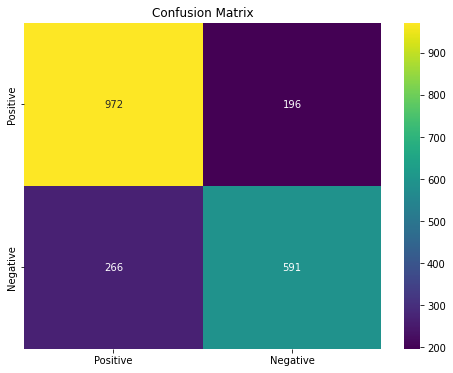

In [85]:
# Calculate confusion matrix
confusionmetrices = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusionmetrices)

clabel = ["Positive","Negative"]
plt.figure(figsize=(8,6))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
sns.heatmap(confusionmetrices, annot=True, fmt="d", cmap="viridis",xticklabels=clabel, yticklabels=clabel)
plt.show()

In [95]:
# Finding out misclassified tweet w.r.t to the actual and predicted labels
misclassified_indices = [indx for indx, (truelabel, predlabel) in enumerate(zip(y_test, y_pred_binary)) if truelabel != predlabel]
print("Total Misclassified tweets - " + str(len(misclassified_indices)) + "\n")

for idx in misclassified_indices:
    truelabel = y_test.iloc[idx]
    predlabel = y_pred_binary[idx][0]
    tweet = X_test.iloc[idx]
    print(f"Actual: " + str(truelabel) + " Predicted: " + str(predlabel) + " Tweet: " + tweet)

Total Misclassified tweets - 462

Actual: 1.0 Predicted: 0 Tweet: chinas ecommerce firms alibaba baba tencent jd still growing revenue 40
Actual: 0.0 Predicted: 1 Tweet: brooklyn locksmith domesticate emergency mechanic services circa clock movement gba
Actual: 0.0 Predicted: 1 Tweet: 7 injured pro bowl back
Actual: 0.0 Predicted: 1 Tweet: im experienced injuries waist
Actual: 0.0 Predicted: 1 Tweet: trusting iran stop terrorism like inviting arsonist join fire brigade telegraph
Actual: 1.0 Predicted: 0 Tweet: citation billings police officer caused broadwater crash
Actual: 1.0 Predicted: 0 Tweet: kessler syndrome name catastrophic exponential proliferation space debris destruction satellites gravitymovie
Actual: 0.0 Predicted: 1 Tweet: new nanotech device able target destroy blood clots
Actual: 1.0 Predicted: 0 Tweet: debatequestionswewanttohear u start another war would u b willing 2 go 2 warzone send ur sons andor daughters 2 fight
Actual: 0.0 Predicted: 1 Tweet: day 1 tryouts went 

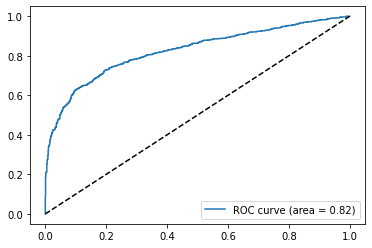

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Compute the ROC curve by comparing the predicted probabilities (y_pred) to the true labels (y_test).
plt.figure() # Create a new figure to plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc) # Plot the ROC curve using the false positive rate (fpr) on the x-axis and the true positive rate (tpr) on the y-axis.
plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal line representing the ROC curve for a random classifier.
plt.legend(loc="lower right") # Add a legend to the plot, placing it in the lower right corner.
plt.show() #displaying the graph

In [ ]:
model.save('dnn_model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
# # Create Word Clouds
relevant_tweets = df.query("Category==1")["Cleaned_Tweet"].apply(str).str.cat(sep=' ')
not_relevant_tweets = df.query("Category==0")["Cleaned_Tweet"].apply(str).str.cat(sep=' ')

In [ ]:
# Preprocess and generate word frequencies for relevant tweets
relevant_wordcloud = WordCloud().generate(relevant_tweets)


In [ ]:

# Preprocess and generate word frequencies for not relevant tweets
not_relevant_wordcloud = WordCloud().generate(not_relevant_tweets)

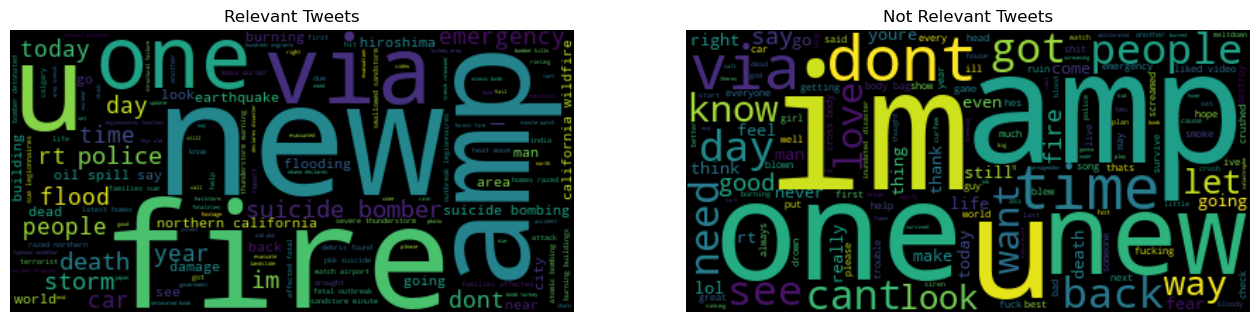

In [ ]:
# Plot the word clouds
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(relevant_wordcloud, interpolation="bilinear")
plt.title("Relevant Tweets")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(not_relevant_wordcloud, interpolation="bilinear")
plt.title("Not Relevant Tweets")
plt.axis("off")
plt.show()

In [ ]:
import tkinter as tk
from tkinter import messagebox
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
window = tk.Tk()
window.title("News or Tweet Classification")
window.geometry("600x400")
model = load_model("dnn_model.h5")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Cleaned_Tweet'])
def classify_text():
    text = entry_text.get("1.0", tk.END)
    if text:
        sequence = tokenizer.texts_to_sequences([text])
        padded_sequence = pad_sequences(sequence, padding='post', maxlen=tokenizer.num_words)
        prediction = model.predict(padded_sequence)
        result = "Relevant" if prediction >= 0.5 else "Not Relevant"
        output_text.delete("1.0", tk.END)
        output_text.insert(tk.END, result)
    else:
        messagebox.showwarning("Please enter some text")
entry_text = tk.Text(window, height=5, width=40)
entry_text.pack(pady=10)

button_classify = tk.Button(window, text="Classify", command=classify_text)
button_classify.pack(pady=10)

output_text = tk.Text(window, height=1, width=40)
output_text.pack()
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yaswa\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\yaswa\AppData\Local\Temp\ipykernel_30248\2148628697.py", line 18, in classify_text
    prediction = model.predict(padded_sequence)
  File "C:\Users\yaswa\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\yaswa\AppData\Local\Temp\__autograph_generated_fileagvwl62r.py", line 15, in tf__predict_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\yaswa\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\yaswa\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function 

1/1 [==============================] - 0s 362ms/step
